## 로지스틱 회귀로 와인 분류하기

In [6]:
# 데이터 불러오기

import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [7]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


- class 타깃값이 0 : 레드 와인 / 1 : 화이트 와인
- 이진 분류 문제
- 화이트 와인 : 양성 클래스
- => 전체 와인 데이터에서 화이트 와인을 골라내는 문제

In [8]:
wine.info() # 각 열의 데이터 타입과 누락된 데이터가 있는지 확인 가능

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


- 총 6,497개 샘플이 있음
- Non-Null Count가 6497이므로 누락된 값은 없음
- 누락된 값이 있으면 평균, 중앙값 등으로 테스트 세트의 누락된 값을 채워야함

In [9]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


- describe()
- 열에 대한 간략한 통계 출력
- 최소, 최대, 평균값 볼 수 있음

- 도수, 당도, pH값의 스케일이 다르기에 특성 표준화 필요
- StandardScaler 클래스
- 판다스 데이터프레임을 넘파이 배열로 바꾸고 훈련 세트와 테스트 세트로 나눔

In [10]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

# 처음 3개열은 data 배열에, class열은 넘파이 배열로 바꿔 target 배열에 저장

In [11]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

- train_test_split() : 설정하지 않으면 25%를 테스트 세트로 지정
- test_size = 0.2 : 20%만 테스트 세트로 나눔

In [12]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [13]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [14]:
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀 모델 훈련

lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))


0.7808350971714451
0.7776923076923077


- 점수가 높지 않음
- 훈련 세트와 테스트 세트의 점수가 모두 낮아 모델이 다소 과소적합됨

In [15]:
print(lr.coef_, lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


- 알코올 도수와 당도가 높을수록 화이트 와인일 가능성이 높고, pH가 높을수록 레드 와인일 가능성이 높은 것 같음
- 정확히 이 숫자가 무엇을 의미하는지 설명하긴 어려움

## 결정 트리
- 이유를 설명하기 쉬움
- 데이터를 잘 나눌 수 있는 질문을 찾는다면 계속 질문을 추가해서 분류 정확도를 높일 수 있음

In [16]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


- 훈련 세트에 대한 점수가 높음
- 과대적합된 모델

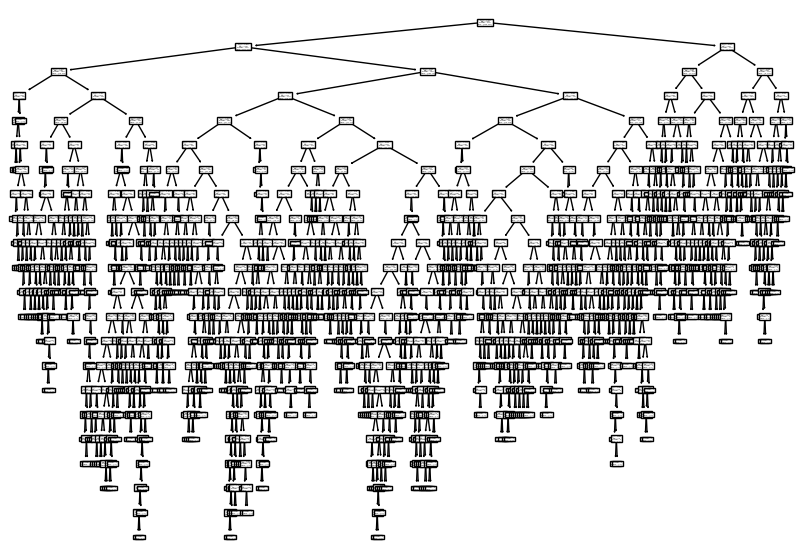

In [17]:
# 결정 트리 모델 그림으로 출력하기

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize = (10, 7))
plot_tree(dt)
plt.show()

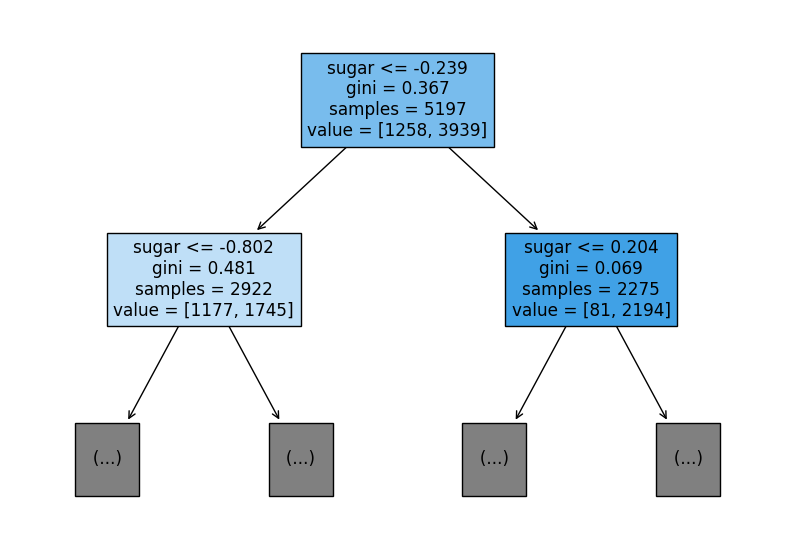

In [18]:
# plot_tree() 트리의 깊이를 제한하여 출력
# max_depth 매개변수 1은 루트 노드를 제외하고 하나의 노드를 더 확장하여 그림
# filled 매개변수에 클래스에 맞게 노드 색을 칠 할 수 있음
# feature_nameseh 매개변수에 특성의 이름 전달 가능
plt.figure(figsize=(10, 7))
plot_tree(dt, max_depth=1, filled = True, feature_names = ['alcohol', 'sugar', 'pH'])
plt.show()

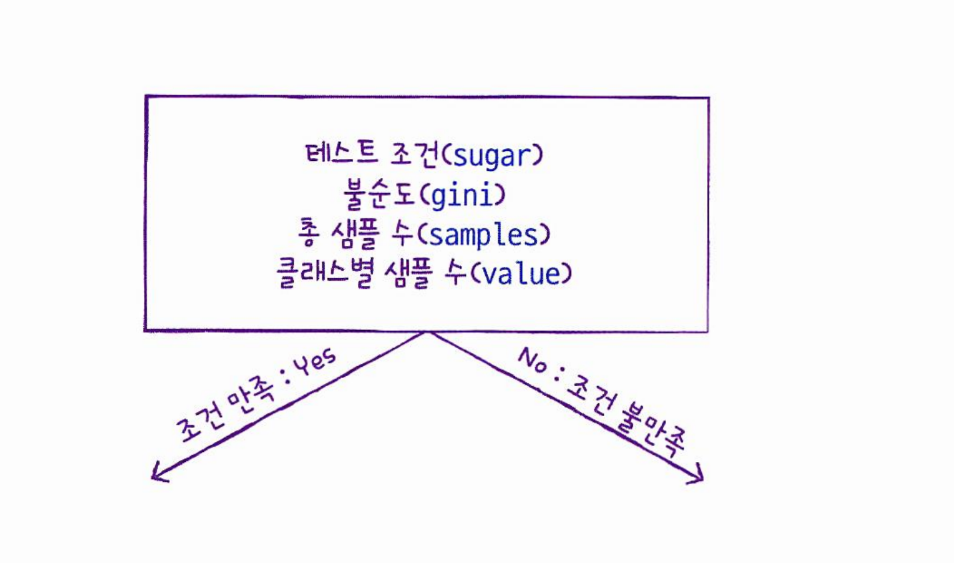

- 노드 : 당도가 -0.239 이하인지 질문
- 왼쪽이 Yes, 오른쪽이 No
- 루트 노드의 총 샘플 수는 5,197개
- 음성 클래스(레드와인) 1,258개 / 양성클래스(화이트와인) 3,939개
- filled = True로 지정하면 클래스마다 색깔을 부여하고, 어떤 클래스의 비율이 높아지면 점점 진한 색으로 표시
- 결정 트리의 성장을 멈춘다면 양성 클래스의 개수가 많아 두 노드 모두 양성 클래스로 예측됨

## 불순도
- gini : 지니 불순도
- DecisionTreeClassifier 클래스의 criterion 매개변수의 기본값이 'gini'
- criterion 매개변수의 용도는 노드에서 데이터를 분할할 기준을 정하는 것
- 지니 불순도 = 1 - (음성 클래스 비율^2 + 양성 클래스 비율^2)
- Ex) 루트 노드의 지니 불순도
- => 1 - ((1258/5197)^2 + (3939/5197)^2) = 0.367
- 결정 트리 모델은 부모 노드와 자식 노드의 불순도 차이가 가능한 크도록 트리를 성장시킴
- => 이런 부모와 자식 노드의 불순도 차이 : **정보 이득**
- => 불순도 기준을 사용해 정보 이득이 최대가 되도록 노드를 분할

## 가지치기

In [19]:
# 가지치기 간단한 방법 트리의 최대 깊이 지정

dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


- 훈련 세트의 성능은 낮아졌지만, 테스트 세트의 성능은 거의 그대로

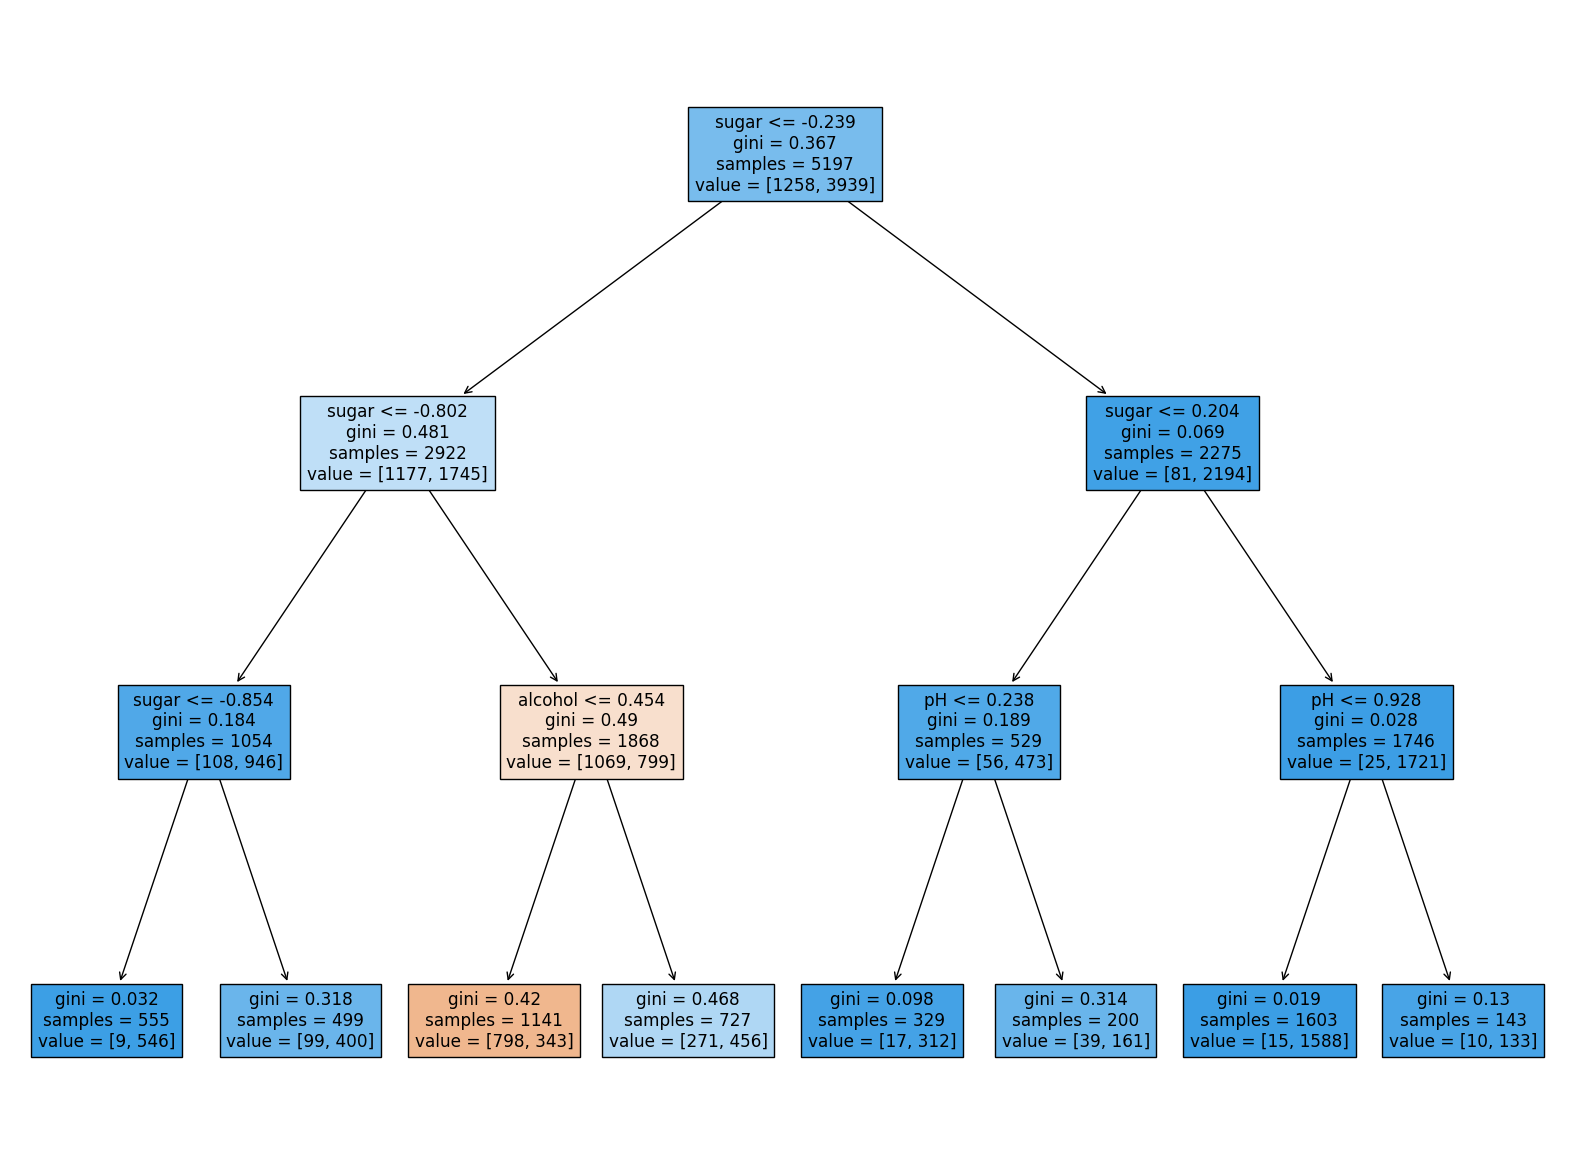

In [20]:
plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

- 당도가 -0.902보다 크고 -0.239보다 작은 와인 중에 알코올 도수가 0.454와 같거나 작은 것이 레드 와인
- 결정 트리 알고리즘은 표준화 전처리를 할 필요 없음

In [21]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


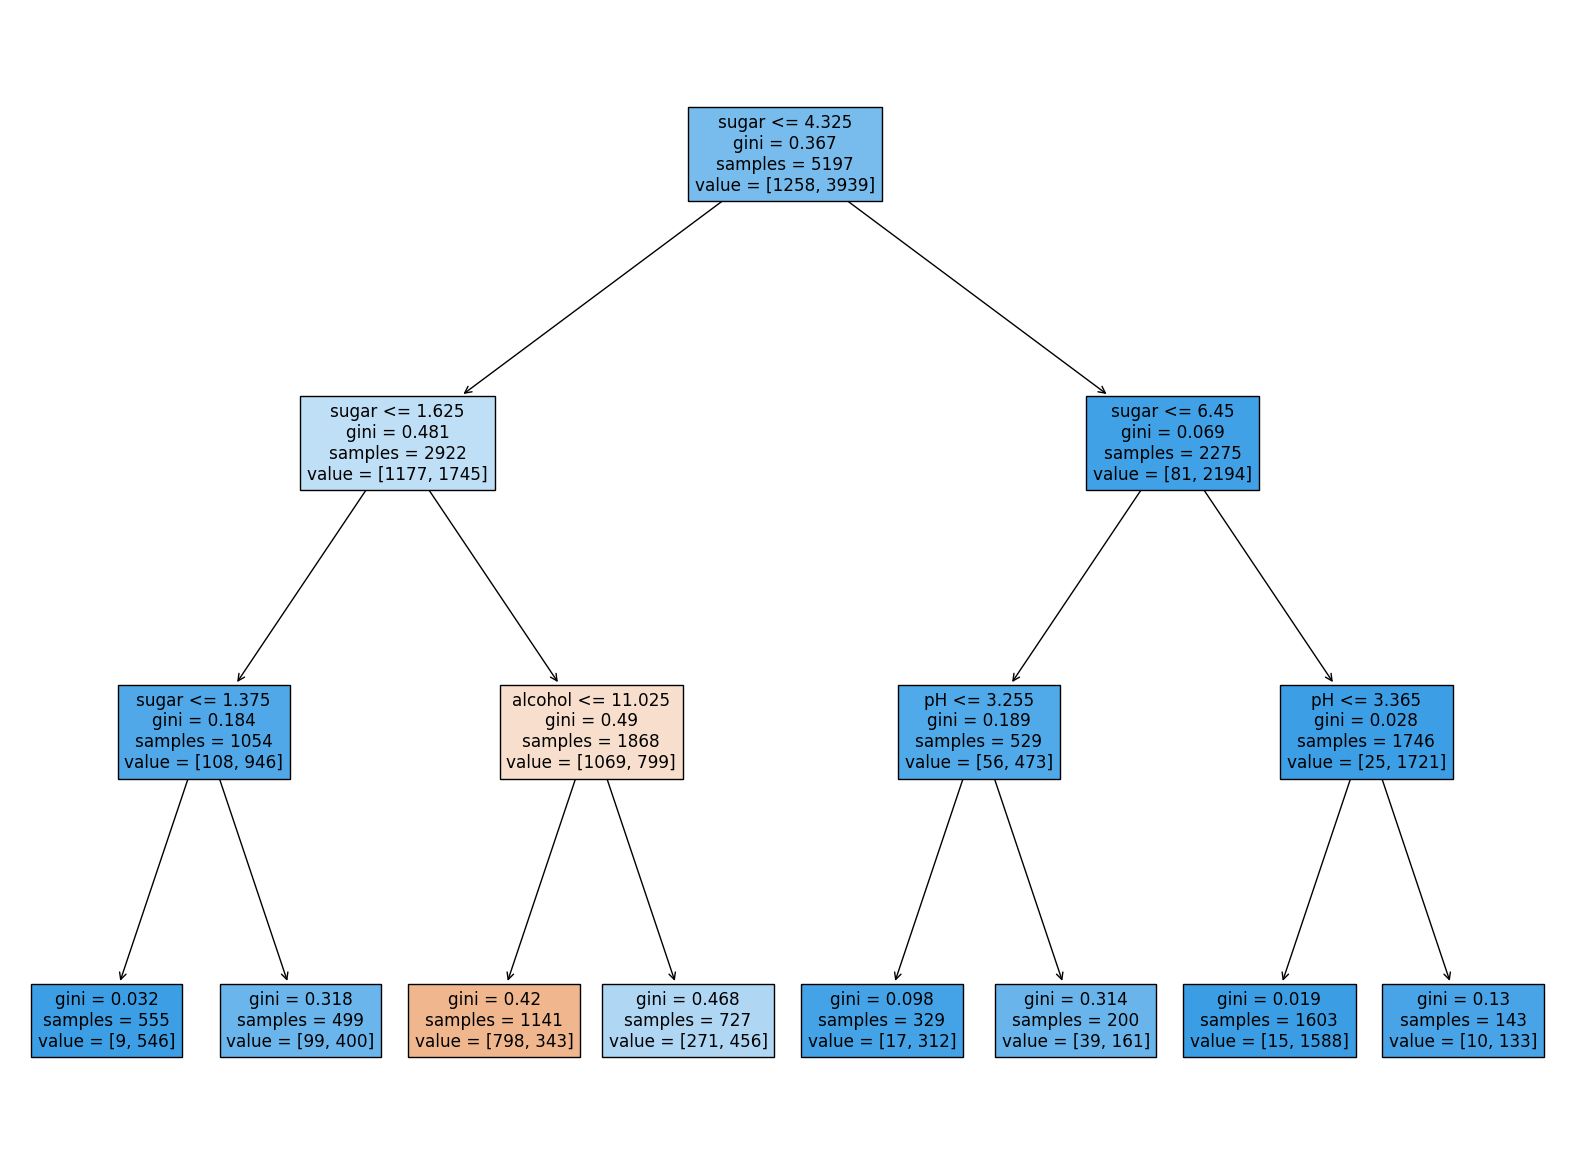

In [22]:
plt.figure(figsize = (20, 15))
plot_tree(dt, filled = True, feature_names = ['alcohol', 'sugar', 'pH'])
plt.show()

- 특성값을 표준점수로 바꾸지 않아 이해하기 쉬움
- 당도가 1.625보다 크고 4.325보다 작은 와인 중에 알코올 도수가 11.025와 같거나 작은 것이 레드 와인
- 결정 트리는 어떤 특성이 가장 유용한지 나타내는 특성 중요도 계산해줌

In [23]:
# 특성 중요도

print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]


- 두 번째 특성인 당도가 0.87로 특성 중요도가 가장 높음
- 당도, 알코올 도수, pH순 => 총 1
- 특성 중요도는 각 노드의 정보 이득과 전체 샘플에 대한 비율을 곱한 후 특성별로 더하여 계산
- 특성 중요도 활용시 결정 트리 모델을 특성 선택에 활용 가능


## 교차 검증과 그리드 서치


### 검증 세트
- 훈련 세트를 나눠 검증 세트를 만듦
- 훈련 세트에서 모델을 훈련하고 검증 세트로 모델을 평가함

In [24]:
import pandas as pd
wine = pd.read_csv('http://bit.ly/wine_csv_data')

In [25]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [26]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [27]:
# train_input과 train_target을 다시 split하여 검증 세트 만들기

sub_input, val_input, sub_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [28]:
print(sub_input.shape, val_input.shape)

(4157, 3) (1040, 3)


In [29]:
# sub_input, sub_target과 val_input, val_target을 사용해 모델을 만들고 평가

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(sub_input, sub_target)
print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))

0.9971133028626413
0.864423076923077


- 모델이 과대적합되었음

## 교차 검증
- 검증 세트를 조금 떼어 놓으면 검증 점수가 불안정함
- => 교차 검증을 이용해 안정적인 검증 점수를 얻고 훈련에 더 많은 데이터 사용 가능
- 검증 세트를 떼어 내어 평가하는 과정을 여러 번 반복하여 검증 점수의 평균하여 최종 검증 점수를 얻는다

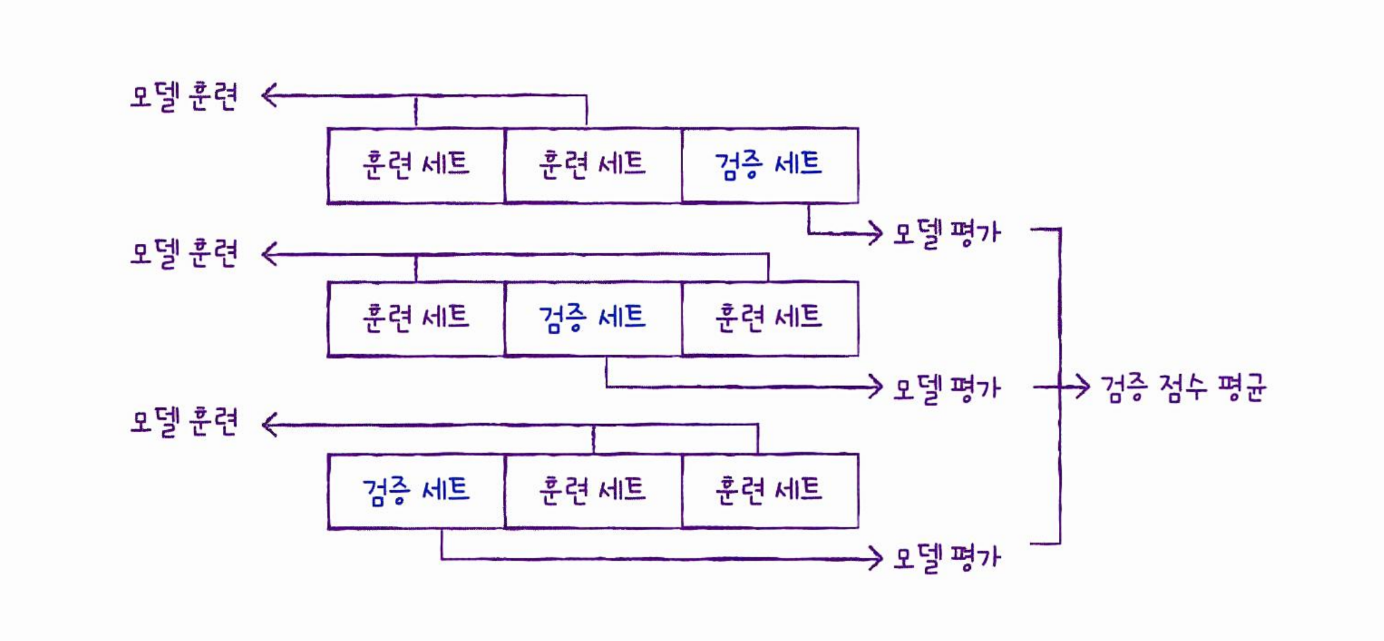

- 위는 3-폴드 교차 검증
- 5-폴드 교차 검증 & 10-폴드 교차 검증 많이 사용
- => 80%~90% 데이터 훈련 가능
- 검증 세트가 줄어들지만 각 폴드에서 계산한 검증 점수를 평균하기에 안전된 점수로 생각 가능

In [30]:
# cross_validate() : 교차 검증 함수

from sklearn.model_selection import cross_validate
scores = cross_validate(dt, train_input, train_target)
print(scores)

{'fit_time': array([0.01078296, 0.01355076, 0.01080537, 0.02051306, 0.01402307]), 'score_time': array([0.00161695, 0.00177598, 0.00172472, 0.00305891, 0.00171971]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}


- fit_time / score_time : 모델을 훈련하는 시간과 검증하는 시간
- cross_validate() : 기본적으로 5-폴드 교차 검증을 수행
- cv 매개변수에서 폴드 수를 바꿀 수 있음

In [31]:
# 교차 검증의 최종 점수는 test_score 키에 담긴 5개의 점수를 평균하여 얻을 수 있다

import numpy as np
print(np.mean(scores['test_score']))

0.855300214703487


- 교차 검증을 할 때 훈련 세트를 섞으려면 분할기 지정해야 함
- 교차 검증에서 폴드를 어떻게 나눌지 결정
- 회귀 모델 : KFold 분할기
- 분류 모델 : StratifiedKFold 사용

In [32]:
from sklearn.model_selection import StratifiedKFold

scores = cross_validate(dt, train_input, train_target, cv = StratifiedKFold())
print(np.mean(scores['test_score']))


0.855300214703487


In [33]:
# 훈련 세트를 섞은 후 10-폴드 교차 검증 수행

splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_validate(dt, train_input, train_target, cv=splitter)
print(np.mean(scores['test_score']))

0.8574181117533719


## 하이퍼파라미터 튜닝

## 그리드 서치
- max_depth의 최적값은 min_samples_split 매개변수의 값이 바뀌면 함께 달라짐
- 두 매개변수를 동시에 바꿔가며 최적의 값을 찾아야 함
- 하이퍼파라미터 탐색과 교차 검증을 한 번에 수행

In [34]:
from sklearn.model_selection import GridSearchCV
params = {'min_impurity_decrease': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}

# 0.0001씩 증가하는 5개의 값 시도

gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs = -1)

- GridSearchCV의 cv 매개변수 기본값은 5개이므로, min_impurity_decrease 값마다 5-폴드 교차 검증 수행
- 총 25개의 모델 훈련
- n_jobs : 병렬 실행에 사용할 CPU 코어 수 지정
- => 기본값 1
- => -1로 지정하면 시스템에 있는 모든 코어 사용

In [35]:
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

In [36]:
dt = gs.best_estimator_
print(dt.score(train_input, train_target))

0.9615162593804117


- 최적의 하이퍼파라미터를 찾으면 전체 훈련 세트로 모델을 다시 만들어야 함
- 사이킷런 그리드 서치는 훈련이 끝나면 검증 점수가 가장 높음 모델의 매개변수 조합으로 전체 훈련세트 다시 훈련
- best_estimator_ 속성에 저장됨

In [37]:
print(gs.best_params_)

{'min_impurity_decrease': 0.0001}


- 0.0001이 가장 좋은 값으로 선택
- 수행한 교차 검증의 평균 점수는 cv_results_ 속성의 'mean_test_score' 키에 저장됨

In [38]:
print(gs.cv_results_['mean_test_score'])

[0.86819297 0.86453617 0.86492226 0.86780891 0.86761605]


- 첫 번째 값이 가장 큼
- 넘파이 argmax() 함수는 가장 큰 값의 인덱스를 추출함
- 이 인덱스를 params 키에 저장된 매개변수 출력 가능
- => 최상의 검증 점수를 만든 매개변수 조합


In [39]:
best_index = np.argmax(gs.cv_results_['mean_test_score'])
print(gs.cv_results_['params'][best_index])

{'min_impurity_decrease': 0.0001}


- 1) 탐색할 매개변수 지정
- 2) 훈련 세트에서 그리드 서치 수행하여 최상의 평균 검증 점수로 매개변수 조합 찾기 => 조합은 그리드 서치 객체에 저장
- 3) 그리드 서치는 매개변수에서 전체 훈련 세트를 사용해 최종 모델을 훈련 -> 그리드 서치 객체 저장

In [40]:
# min_impurity_decrease : 노드를 분할하기 위한 불순도 감소 최소량 지정
# min_samples_split : 노드를 나누기 위한 최소 샘플 수 고름

params = {'min_impurity_decrease' : np.arange(0.0001, 0.001, 0.0001),
          'max_depth': range(5, 20, 1),
          'min_samples_split' : range(2, 100, 10)}

- 넘파이 arange() 함수 : 첫 번째 매개변수 값에서 시작하여 두 번째 매개변수에 도달할 때까지 세 번째 매개변수를 계속 더한 배열을 만듦
- => 0.0001에서 0.001까지 0.0001까지 계속 더한 배열
- range() 함수 : max_depth를 5에서 20까지 1씩 증가하면서 15개의 값을 만듦
- min_samples_split은 2에서 100까지 10씩 증가하면서 10개의 값을 만듦
- => 교차 검증 횟수 9 X 15 X 10 = 1,350개
- => 기본 5-폴드 교차검증 : 6,750개

In [41]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 20),
                         'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'min_samples_split': range(2, 100, 10)})

In [42]:
# 최상 매개변수 조합 확인
print(gs.best_params_)

{'max_depth': 14, 'min_impurity_decrease': 0.0004, 'min_samples_split': 12}


In [43]:
# 최상의 교차 검증 점수 확인

print(np.max(gs.cv_results_['mean_test_score']))

0.8683865773302731


## 랜덤 서치
- 매개변수의 값이 수치일 때 값의 범위나 간격을 정하기 어렵거나, 너무 많은 매개 변수 조건이 있어 그리드 서치 수행 시간이 오래 걸릴 때 사용
- 랜덤 서치에는 매개변수 값의 목록을 전달하는 것이 아닌, 매개변수를 샘플링할 수 있는 확률 분포 객체를 전달함


In [44]:
from scipy.stats import uniform, randint # uiform & randint : 주어진 범위에서 고르게 값을 뽑
# randint : 정수값을 뽑음 / uniform : 실숫값을 뽑음

rgen = randint(0, 10)
rgen.rvs(10)

array([1, 0, 8, 2, 2, 2, 1, 8, 7, 2])

In [45]:
# 1000개 샘플링 후 각 숫자의 개수 세기

np.unique(rgen.rvs(1000), return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([104,  99, 104, 114,  95,  98,  79,  92, 112, 103]))

In [46]:
ugen = uniform(0, 1)
ugen.rvs(10)

array([0.81887478, 0.14864692, 0.1525311 , 0.34936418, 0.67070466,
       0.4240663 , 0.37570669, 0.75368479, 0.52589322, 0.59735238])

In [47]:
# min_samples_leaf : 리프 노드가 되기 위한 최소 샘플의 개수

params = {'min_impurity_decrease' : uniform(0.0001, 0.001), # 0.0001 ~ 0.001 사이 실숫값 샘플링
          'max_depth' : randint(20, 50), # 20 ~ 50 사이의 정수
          'min_samples_split' : randint(2, 25), # 2 ~ 25 사이의 정수
          'min_samples_leaf' : randint(1, 25), } # 1~25사이의 정수 샘플링

In [48]:
from sklearn.model_selection import RandomizedSearchCV

gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params, n_iter=100, n_jobs=-1, random_state=42)
gs.fit(train_input, train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x793e88c019f0>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x793e88c02c80>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x793e88c01600>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x793e88c00fa0>},
                   random_state=42)

- 샘플링 횟수는 사이킷런의 랜덤 서치 클래스인 RandomizedSearchCV의 n_iter 매개변수에 저장
- params에 정의된 매개변수 범위에서 총 100번(n_iter)을 샘플링하여 교차 검증을 수행하고 최적의 매개변수 조합 찾음
- 그리드 서치보다 훨씬 교차 검증 수를 줄이면서 넓은 영역을 효과적으로 탐색 가능

In [49]:
print(gs.best_params_)

{'max_depth': 39, 'min_impurity_decrease': 0.00034102546602601173, 'min_samples_leaf': 7, 'min_samples_split': 13}


In [50]:
# 최고의 교차 검증 점수 확인

print(np.max(gs.cv_results_['mean_test_score']))

0.8695428296438884


In [51]:
# 최적의 모델은 best_estimator_ 속성에 저장되어 있음

dt = gs.best_estimator_
print(dt.score(test_input, test_target))

0.86


- 테스트 세트 점수는 검증 세트에 대한 점수보다 조금 작은 것이 일반적

# 트리의 앙상블


# 정형 데이터와 비정형 데이터
- 어떤 구조로 되어 있는 데이터 : **정형 데이터**
- 데이터베이스나 엑셀로 표현하기 어려운 데이터 : **비정형데이터**
- => 정형 데이터를 다루는 데 가장 뛰어난 성과를 내는 알고리즘 : **앙상블 학습**


## 랜덤 포레스트
- 앙상블 학습의 대표
- 결정트리를 랜덤하게 만들어 숲을 만듦
- 입력한 훈련 데이터에서 랜덤하게 샘플을 추출하여 훈련 데이터를 만듦 => **부트스트램 샘플**
- RandomForestClassifier은 전체 특성 개수의 제곱근만큼의 특성 선택

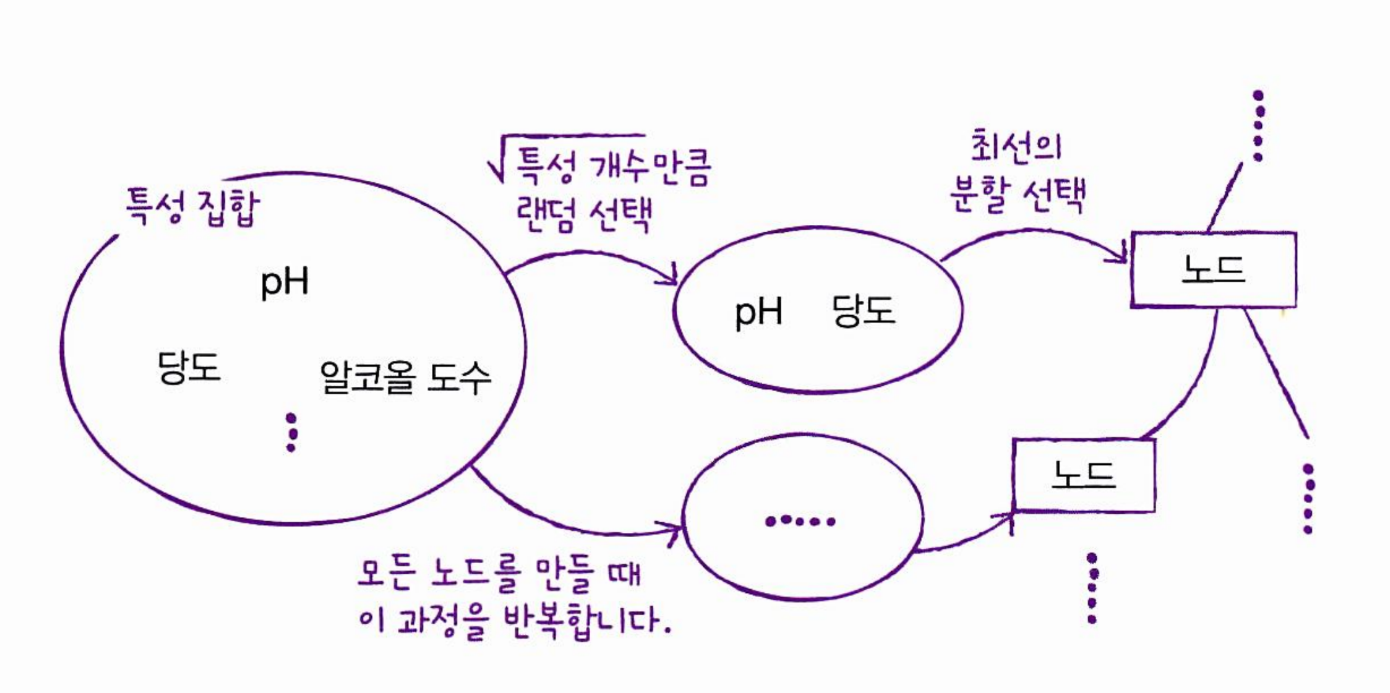

- 기본적으로 100개의 결정 트리를 이런 방식으로 훈련
- 각 트리의 클래스별 확률을 평균하여 가장 높은 확률을 가진 클래스를 예측으로 삼음
- **랜덤 포레스트**
- => 랜덤하게 선택한 샘플과 특성을 사용하기에 훈련 세트에 과대적합되는 것을 막아줌 & 검증 세트와 테스트 세트에서 안정적인 성능을 얻을 수 있음

In [52]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

wine = pd.read_csv('https://bit.ly/wine_csv_data')
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [53]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(rf, train_input, train_target, return_train_score = True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9973541965122431 0.8905151032797809


- 과대적합된 모습을 볼 수 있음

- 랜덤 포레스트의 특성 중요도 : 각 결정 트리의 특성 중요도를 취합한 것

In [54]:
rf.fit(train_input, train_target)
print(rf.feature_importances_)

[0.23167441 0.50039841 0.26792718]


- 특성 일부를 랜덤하게 선택하여 결정 트리를 훈련하기에 하나의 특성에 과도하게 집중하지 않고 좀 더 많은 특성이 훈련에 기여할 기회를 제공
- => 과대적합을 줄이고 일반화 성능을 높이는데 도움
- 자체적으로 모델을 평가하는 점수를 얻을수 있음
- => 부트스트랩 샘플에 포함되지 않고 남는 샘플(**OOB 샘플**) -> 검증 세트의 역할

In [55]:
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)
rf.fit(train_input, train_target)
print(rf.oob_score_)

0.8934000384837406


- OOB 점수를 사용하면 교차 검증을 대신하여 결과적으로 훈련 세트에 더 많은 샘플을 사용할 수 있음

## 엑스트라 트리
- 기본적으로 100개의 결정 트리 훈련
- 부트스트랩 샘플을 사용하지 않음
- 결정 트리를 만들 때 전체 훈련 세트를 사용함
- 단, 노드 분할할 때 무작위로 분할한다
- => 성능이 낮아지겠지만, 많은 트리를 앙상블 하기 때문에 과대적합을 맞고 검증 세트의 점수를 높이는 효과가 있음

In [56]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(et, train_input, train_target,
                        return_train_score=True, n_jobs=-1)
print(np.mean(scores['test_score']), np.mean(scores['test_score']))

0.8887848893166506 0.8887848893166506


- 엑스트라 트리가 무작위성이 좀 더 크기 때문에 랜덤 포레스트보다 더 많은 결정 트리를 훈련해야 한다
- 랜덤하게 노드를 분할하기 때문에 계산 속도가 빠르다

In [57]:
et.fit(train_input, train_target)
print(et.feature_importances_)

[0.20183568 0.52242907 0.27573525]


- 엑스트라 트리의 회귀 버전 : ExtraTreesRegressor

## 그레이디언트 부스팅

- 깊이가 얕은 결정 트리를 사용하여 이전 트리의 오차를 보완하는 방식으로 앙상블 하는 방법
- 기본적으로 깊이가 3인 결정트리 100개를 이용
- 깊이가 얕은 결정 트리를 사용하여 과대적합에 강하고 높은 일반화 성능 기대 가능
- 경사하강법을 사용하여 트리 앙상블에 추가
- 결정 트리를 계속 추가하면서 가장 낮은 곳을 찾아 이동함

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, train_input, train_target,
                        return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8881086892152563 0.8720430147331015


- 거의 과대적합이 되지 않음
- 학습률을 증가시키고 트리 개수를 늘리면 좀 더 성능이 향상됨


In [59]:
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9464595437171814 0.8780082549788999


- 결정 트리 개수를 500개로 5배나 늘려도 과대적합 잘 억제함
- 학습률 learning_rate의 기본값은 0.1

In [60]:
# 그레이디언트 부스팅 특성 중요도

gb.fit(train_input, train_target)
print(gb.feature_importances_)
# 당도에 더 집중함

[0.15872278 0.68010884 0.16116839]


- 트리 훈련에 사용할 훈련 세트의 비율을 정하는 subsample
- => 기본 매개변수값 1.0으로 전체 훈련 세트 사용
- => 1보다 작으면 훈련 세트의 일부 사용 => 확률적 경사 하강법 / 미니배치 경사 하강법과 비슷
- 랜덤 포레스트보다 조금 더 높은 성능을 얻을 수 있지만, 순서대로 트리를 추가하여 훈련 속도가 느림
- GradientBoostingClassifier에는 n_jobs 매개변수 없음


## 히스토그램 기반 그레이디언트 부스팅
- 그레이디언트 부스팅의 속도와 성능을 개선
- 입력 특성을 256개의 구간으로 나눠 노드를 분할할 때 최적의 분할을 매우 빠르게 찾을 수 있음
- 256개의 구간 중에서 하나를 떼어 놓고 누락된 값을 위해 사용함
- 트리의 개수를 지정하는데, max_iter를 사용하여 지정


In [61]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, train_input, train_target, return_train_score=True)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9321723946453317 0.8801241948619236


- 과대적합을 잘 억제하면서 그레이디언트 부스팅보다 조금 더 높은 성능 제공

In [62]:
# 특성 중요도 : permutation_importance()

from sklearn.inspection import permutation_importance
hgb.fit(train_input, train_target)
result = permutation_importance(hgb, train_input, train_target, n_repeats=10, random_state=42, n_jobs=-1)
print(result.importances_mean) # 중요도 / 평균 / 표준 편차 제공

[0.08876275 0.23438522 0.08027708]


- 특성을 하나씩 랜덤하게 섞어 모델의 성능이 변화하는지 관찰하여 어떤 특성이 중요한지 계산
- 훈련 세트뿐만 아니라 테스트 세트에도 적용 가능
- n-repeats : 랜덤하게 섞을 횟수 지정 (기본값 5)

In [63]:
result = permutation_importance(hgb, test_input, test_target, n_repeats=10, random_state=42, n_jobs=-1)
print(result.importances_mean)

# 당도에 집중하고 있음

[0.05969231 0.20238462 0.049     ]


In [64]:
# 테스트 세트에서의 성능

hgb.score(test_input, test_target)

0.8723076923076923

- 앙상블 모델이 단일 결정 트리보다 좋은 결과를 얻을 수 있음

- 사이킷런 말고 히스토그램 기반 그레이디언트 부스팅 알고리즘 구현 라이브러리 : XGBoost
- tree_method 매개변수를 'hist'로 지정 시 히스토그램 기반 그레이디언트 부스팅 사용 가능

In [65]:
from xgboost import XGBClassifier
xgb = XGBClassifier(tree_method='hist', random_state=42)
scores = cross_validate(xgb, train_input, train_target, return_train_score=True)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9558403027491312 0.8782000074035686


In [65]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(random_state=42)
scores = cross_calidate(lgb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(['test_score']))